In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# Write your imports here

# Linear and Logistic Regression Lab
## Getting acquainted with the tools. Performing some common tasks and creating our first models 

You will receive labs in this format. Edit the file to make everything work.

You can add some cells as you wish. Some cells are read-only - you won't be able to edit them.

**Notes:** 
1. **DO NOT** copy everything in a new file. Edit this one (.ipynb), save it and submit it. **DO NOT** rename the file.
2. Be careful what is asked of you - all problems have checks that you need to pass in order to get the points.
3. There are tests that you can see, as well as hidden tests. You'll have to perform well on both the visible and the hidden tests. **In this assignment only**, there are no hidden tests. This is just for your convenience.
4. If you have used other files, upload them too. You don't need to upload any files supplied with the lab assignment.
5. Each lab is scored on a scale from 0 to 10. You can get partial credit (e. g. 5 / 10).

### Problem 1. Read the data (1 point)
The dataset comes from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00222/). It contains information about the marketing of a Portuguese bank.

The data you need to read is the `bank.csv` file in the `data` folder (use ";" as the column separator). The `bank-names.txt` file contains information about the dataset. Read it and you'll get some information about what it contains.

Read the dataset using `pandas` (you can use the library with the alias `pd`). Save it in the `bank_data` variable.

In [3]:
bank_data = pd.read_csv('data/bank.csv', sep=';')
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
np.random.seed(42)
assert_is_not_none(bank_data)
assert_equal(bank_data.shape, (4521, 17))

### Problem 2. Separate features and labels (2 points)

Separate the explanatory variables and the output variable (it's called `y` in this case). Create two new variables.

In [5]:
bank_features = bank_data.drop('y', axis=1)
bank_output = bank_data.y

In [6]:
assert_equal(bank_features.shape, (4521, 16))
assert_equal(bank_output.shape, (4521,))

### Problem 3.  Convert categorical variables (1 + 1 points)
Convert all categorical variables in `bank_features` into indicator variables (dummies). Save the result in the same variable. (1 point)

In [7]:
bank_features = pd.get_dummies(bank_features)
bank_features.head()

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,30,1787,19,79,1,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1,33,4789,11,220,1,339,4,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2,35,1350,16,185,1,330,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,30,1476,3,199,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,59,0,5,226,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
assert_equal(bank_features.shape, (4521, 51))

Convert the `bank_output` variable to an indicator variable. This can be done in many ways. Look up how in StackOverflow if you get stuck.

The goal is to **rewrite the column** (replace the values): it should be numeric, and be equal to 1 if the original value was "yes" and 0 otherwise. (1 point)

In [9]:
bank_output = bank_output.replace({
    'yes': True,
    'no': False
}).astype(np.int64)

In [10]:
assert_equal(bank_output.dtype, np.int64)

### Problem 4. Perform logistic regression on the original features (1 point)
Perform logistic regression. Save the model in the variable `bank_model`. 

Use all the data. This is not generally recommended but we'll think of a workaround next time.

Pass a large number for the parameter `C = 1e6` (which is equivalent to `C = 1000000`).

In [16]:
bank_model = LogisticRegression(C=1e6)
bank_model = bank_model.fit(bank_features, bank_output)

In [17]:
assert_is_not_none(bank_model)
assert_equal(bank_model.C, 1e6)

### Problem 5. Get an estimate of the model performance (1 point)
Use `bank_model.score()` to get an accuracy score. We'll talk about what it represents later in the course. Save the resulting score in the variable `accuracy_score`. To generate the score, use all data. Once again, this is not what we do usually but it's a good start anyway.

In [18]:
accuracy_score = bank_model.score(bank_features, bank_output)

In [25]:
assert_almost_equal(accuracy_score, 0.9042247290422473, delta = 0.05)

We have to make a note here. If we explore how the output classes are distributed, we can see that "class 1" is about 11.5% of all samples, i.e. very few clients actually subscribed after the call, which is expected. This means the data is **highly imbalanced**. In this case, accuracy is not a good measure of the overall model performance. We have to look at other scoring measures to get a better estimate of what's going on.

But once again, we're just getting started.

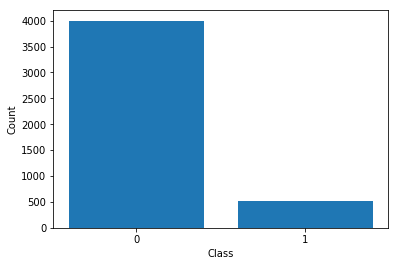

Positive cases: 11.524% of all


In [26]:
# There's nothing to do here, just execute the cell and view the plot and print results.
# Cells like these are here only for your convenience and to help you understand the task better
plt.bar([0, 1], [len(bank_output[bank_output == 0]), len(bank_output[bank_output == 1])])
plt.xticks([0, 1])
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

print("Positive cases: {:.3f}% of all".format(bank_output.sum() / len(bank_output) * 100))

### Problem 6. More features  (1 point)
The score is pretty high. But can we improve it? One way to try and improve it is to use polynomial features. As we saw, this creates all possible multiples of input features. In the real world, this corresponds to **feature interaction**.

Create a model for quadratic features (`degree = 2`). Save it in the variable `quad_feature_transformer`. Also, set `interaction_only` to True: let's suppose we don't want to square each feature. This means that we have all single features $x_1, x_2, \dots$ and all interactions $x_1x_2, x_1x_3, \dots$ but no $x_1^2, x_2^2, \dots$

Using it, transform all `bank_features`. Save them in the variable `bank_features_quad`.

Note how the number of features exploded: from 51 we get more than 1300.

In [28]:
quad_feature_transformer = PolynomialFeatures(interaction_only=True)
bank_features_quad = quad_feature_transformer.fit_transform(bank_features)

In [29]:
assert_equal(quad_feature_transformer.degree, 2)
assert_equal(quad_feature_transformer.interaction_only, True)
assert_equal(bank_features_quad.shape, (4521, 1327))

### Problem 7. Train a model on the quadratic features (1 point)
You know the drill. Fit a logistic regression model with all data in `bank_features_quad` and `bank_output`. Use `C = 1e6`. Save it in `bank_model_quad`. Score it and save the score in the variable `accuracy_score_quad`.

In [35]:
bank_model_quad = LogisticRegression(C=1e6)
bank_model_quad = bank_model_quad.fit(bank_features_quad, bank_output)
accuracy_score_quad = bank_model_quad.score(bank_features_quad, bank_output)

print("Accuracy: {:.3f}".format(accuracy_score_quad))

Accuracy: 0.904


In [36]:
assert_is_not_none(bank_model_quad)
assert_equal(bank_model_quad.C, 1e6)
assert_equal(len(bank_model_quad.coef_[0]), bank_features_quad.shape[1]) # This is a simple check that the model has been trained
assert_almost_equal(accuracy_score_quad, 0.9, delta = 0.1)

Interesting... we have many more features but the accuracy actually dropped a little. We would observe the same behaviour if we took polynomials of degree 3: more than 20 000 features and accuracy less than 0.87.

This is our first example of model selection. Why is the seemingly more complex model less accurate? There are two main reasons:
* As we said, the default score (accuracy) is not good for this dataset, so its values aren't too relevant.
* The number of features is alarmingly high. This leads to what we call "overfitting": our model is too complex. We can't quite catch it with this scoring scheme but we will be able to do that later.

We can try a lot of things: test our model better, improve our scoring schemes, come up with better features, etc. In general, we need to take care of several things:
* Are all parameters relevant? Can we discard some of them and how?
* How do we deal with imbalanced data?
* Is logistic regression the best type of model overall? Are there models that do better on this data?
* What are the best hyperparameters for the model? We chose `C = 1e6` arbitrarily.

We'll continue to do this next time. Let's try just one more thing.

### Problem 8. Perform normalization and compare results (1 point)
We saw very strange results. A part of the problem might be that our data isn't normalized.

Use the `MinMaxScaler` to scale all values in `bank_features_quad`. Save them in `bank_features_quad_scaled`. This will take several seconds.

Perform a logistic regression on the new, scaled features: `bank_features_quad_scaled` and `bank_output`. Use the same parameters to score it.

You should observe that the score improved the score significantly.

In [41]:
scaler = MinMaxScaler()
scaler.fit(bank_features_quad)
bank_features_quad_scaled = scaler.transform(bank_features_quad)

bank_model_quad_scaled = LogisticRegression(C=1e6)
bank_model_quad_scaled = bank_model_quad_scaled.fit(bank_features_quad_scaled, bank_output)
accuracy_score_quad_scaled = bank_model_quad_scaled.score(bank_features_quad_scaled, bank_output)
print(accuracy_score_quad_scaled)

0.969033399690334


In [42]:
assert_is_not_none(bank_model_quad)
assert_equal(bank_model_quad.C, 1e6)
assert_equal(len(bank_model_quad.coef_[0]), bank_features_quad.shape[1])
assert_almost_equal(accuracy_score_quad_scaled, 0.969033399690334, delta = 0.05)

Also, if you do the test, scaling the original features (instead of the quadratic ones) doesn't improve the score much. This is partly because it isn't the best score. Also, our results are a great reminder that **if we have many uncorrelated features, it's almost always a good idea to rescale them**. You can read some papers online, or use the forums to ask if you're interested why exactly this happens.

**The main takeaway from this lab** is working with `scikit-learn` is easy but in order to get meaningful results, you need to understand what you're doing.